# Analysis between birthweight of a new born and the parent's bad habits

### Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import seaborn as sns

## Basic data understanding

In [6]:
# Reading in the data
df_bw = pd.read_excel("data_birthweight.xlsx")

In [7]:
# Listing the names of the columns (for general understanding of the variables and ease to find the exact names after)
# Understanding the shape of the data

print(f"COLUMNS:\n\n{df_bw.columns}")
print(f"\nSHAPE:\n{df_bw.shape}")

COLUMNS:

Index(['nprevist', 'alcohol', 'tripre1', 'tripre2', 'tripre3', 'tripre0',
       'birthweight', 'smoker', 'unmarried', 'educ', 'age', 'drinks'],
      dtype='object')

SHAPE:
(3000, 12)


In [8]:
# Calling the first 5 and last 5 of entries
df_bw.head

<bound method NDFrame.head of       nprevist  alcohol  tripre1  tripre2  tripre3  tripre0  birthweight  \
0           12        0        1        0        0        0         4253   
1            5        0        0        1        0        0         3459   
2           12        0        1        0        0        0         2920   
3           13        0        1        0        0        0         2600   
4            9        0        1        0        0        0         3742   
...        ...      ...      ...      ...      ...      ...          ...   
2995        15        0        0        1        0        0         2520   
2996        10        0        1        0        0        0         3062   
2997        11        0        0        1        0        0         3799   
2998        10        0        1        0        0        0         2070   
2999        11        0        1        0        0        0         2948   

      smoker  unmarried  educ  age  drinks  
0          1

## Understanding Birthweight

In [9]:
# Finding the mean, median, and mode of "birthweight"

mean_bw = np.mean(df_bw['birthweight'])
median_bw = np.median(df_bw['birthweight'])
mode_bw = stats.mode(df_bw['birthweight'])

print(f"MEAN: {mean_bw}\nMEDIAN: {median_bw}\nMODE: {mode_bw}")

MEAN: 3382.933666666667
MEDIAN: 3420.0
MODE: ModeResult(mode=array([3430], dtype=int64), count=array([63]))


In [10]:
# Find more information on "birthweight"
stats.describe(df_bw['birthweight'])

DescribeResult(nobs=3000, minmax=(425, 5755), mean=3382.933666666667, variance=350656.8868955207, skewness=-0.825878868144944, kurtosis=2.547542396076752)

(array([  15.,   18.,   42.,  137.,  565., 1188.,  812.,  207.,   13.,
           3.]),
 array([ 425.,  958., 1491., 2024., 2557., 3090., 3623., 4156., 4689.,
        5222., 5755.]),
 <BarContainer object of 10 artists>)

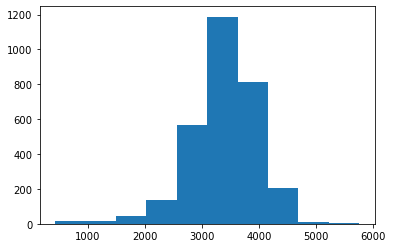

In [12]:
plt.hist(df_bw['birthweight'])

In [11]:
#finding the correlation between birthweight and other variables

cormat = df_bw.corr()
cormat['birthweight']

nprevist       0.227360
alcohol       -0.033647
tripre1        0.112377
tripre2       -0.066714
tripre3       -0.046495
tripre0       -0.123500
birthweight    1.000000
smoker        -0.169127
unmarried     -0.203235
educ           0.105207
age            0.080073
drinks        -0.032409
Name: birthweight, dtype: float64

<AxesSubplot:>

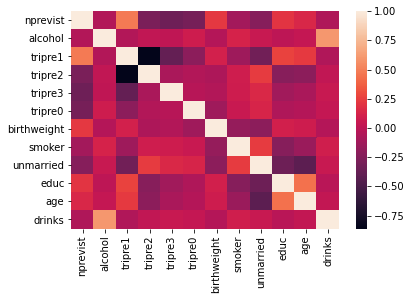

In [13]:
sns.heatmap(cormat)

In [14]:
# Using the stats class from the scipy library, find the linear regression between "smoker" and "birthweight"
# This tells us how greatly the parents smoking affects the birthweight of the newborn

slope, intercept, r, p, std_err = stats.linregress(df_bw['smoker'],df_bw['birthweight'])

print(f"birthweight= = {intercept} + {slope}(smoker = 1,0)")
print(f"\nr: {r}\nstandard error: {std_err}")

birthweight= = 3432.059966914806 + -253.22835179453168(smoker = 1,0)

r: -0.16912660155153952
standard error: 26.951490642156553


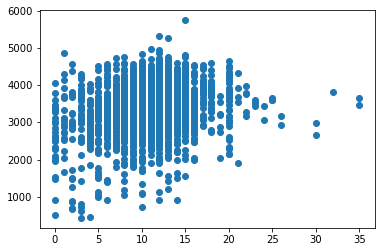

In [15]:
# A scatter plot to demonstrate the spread between doctor visits and birthweight
# This is to represent how much of a BAD representation this is
# later, violin plots and boxplots would be used to illustrate these types of data better

plt.scatter(df_bw['nprevist'],df_bw['birthweight'])

C:\Users\socce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='birthweight'>

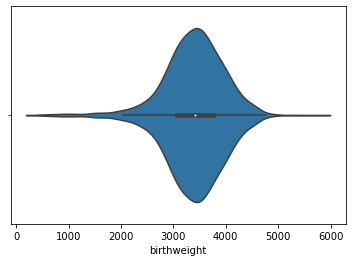

In [29]:
# much like the histogram, this shows the spread of the birthweight data

sns.violinplot(df_bw['birthweight'])

<AxesSubplot:xlabel='smoker', ylabel='birthweight'>

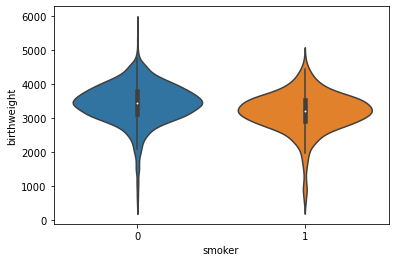

In [26]:
# illustration to show the spread of smokers and non-smokers against the birthweight of a newborn
sns.violinplot(x="smoker", y="birthweight", data=df_bw)

<AxesSubplot:xlabel='nprevist', ylabel='birthweight'>

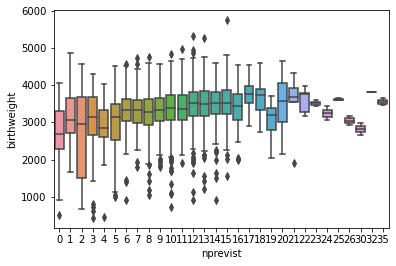

In [27]:
# A violinplot on this data would be a mess; there are too many entries the plot would show lines and represent nothing
# in this case, we use a boxplot. It would show us similar (or even more) information while being readable

sns.boxplot(x="nprevist", y="birthweight", data=df_bw)

# Multiple Regression analysis

In [21]:
X = df_bw[['nprevist','smoker']]
Y = df_bw['birthweight']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

regr.coef_

array([  34.10394232, -218.82938463])